# HW4

# Mehrsa Pourya 95101247

I have answerd questions in this notebook file. 

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
data = pd.read_csv('data.csv')
X, y = data.loc[:, data.columns != 'Survived'],  data.loc[:, data.columns == 'Survived']
XTrain, XTest, yTrain, yTest =  train_test_split(X, y, test_size=0.2, random_state=6)
# Standardize features : zero mean and unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTrainScaled = sc.fit_transform(XTrain)
XTestScaled = sc.fit_transform(XTest)
XTrainScaled = pd.DataFrame(XTrainScaled)
XTestScaled = pd.DataFrame(XTestScaled)
data['groupedAge'] = pd.cut(data.Age, bins=[0, 10, 20, 30, 40, 50, 100], labels = [1, 2, 3 , 4, 5 , 6])
data['gFare'] = pd.cut(data.Fare, bins=[-10, 25, 50, 75, 100, 200, 400, 600], labels = [1, 2, 3, 4, 5, 6, 7])
X, y = data.loc[:, data.columns != 'Survived'],  data.loc[:, data.columns == 'Survived']
# split test and train Data
XTrain, XTest, yTrain, yTest =  train_test_split(X, y, test_size=0.2, random_state=6)
yTrain = yTrain.values.ravel()
yTest = yTest.values.ravel()
features = XTrain.columns[XTrain.columns != 'Survived']

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# 3.1 Logistic Regression

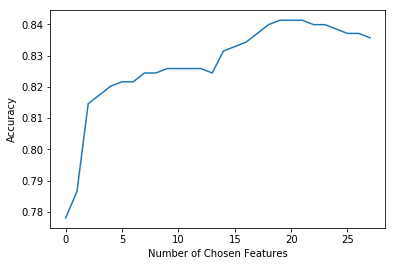

Maximum Acc in Feature Selection Process:
0.8412921348314607
Corrosponded features indexes for Max Acc :
[8, 9, 2, 3, 10, 16, 1, 11, 7, 20, 17, 21, 22, 24, 5, 0, 18, 19, 26, 13]
Chosen Features Names :
['sex_num', 'myTitle_Master', 'SibSp', 'Parch', 'myTitle_Miss', 'Deck_C', 'Age', 'myTitle_Mr', 'Embarked_S', 'Deck_G', 'Deck_D', 'Deck_T', 'Companion', 'CabinRecoverd', 'Embarked_C', 'Pclass', 'Deck_E', 'Deck_F', 'groupedAge', 'myTitle_Other']


In [113]:
# First i Perform Feature Selection and then i will ANSWER given Question
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

n = XTrain.shape[1]
accuracy = []
chosens = []
accuracy.clear()
chosens.clear()
states = list(range(n))
#XTrainFS, XTestFS, yTrainFS, yTestFS =  train_test_split(XTrainScaled, yTrain, test_size=0.1, random_state=42)
for nFeatures in states : 
    maxacc = 0
    for i in states : 
        if (nFeatures == 0 or i not in chosens) :
            if (nFeatures == 0) :
                iters = [i]
            else :
                iters = chosens + [i]
            LRModel = LogisticRegression(solver = 'newton-cg', max_iter = 2000, 
                                         random_state=42).fit(XTrain[XTrain.columns[iters]], yTrain)
            acc = LRModel.score(XTrain[XTrain.columns[iters]], yTrain)
            if (acc > maxacc) :
                maxacc = acc
                chosen = i
    if (nFeatures == 0) :
        accuracy = [maxacc]
        chosens = [chosen]
    else :
        accuracy = accuracy + [maxacc]
        chosens = chosens + [chosen] 
    
plt.plot(accuracy)
plt.xlabel('Number of Chosen Features')
plt.ylabel('Accuracy')
plt.show()
print('Maximum Acc in Feature Selection Process:')
print(max(accuracy))
nC = min(np.where(accuracy == max(accuracy))[0])
print('Corrosponded features indexes for Max Acc :')
chosenFeature = chosens[0:nC+1]
print(chosenFeature)
print('Chosen Features Names :')
print(list(features[chosenFeature]))
trainDataLR =  XTrain[XTrain.columns[chosenFeature]]
testDataLR = XTest[XTest.columns[chosenFeature]]
# i also checked this for scaled data but the orginal data worked better

,feature,coef
7,myTitle_Mr,-1.688574
15,Pclass,-1.033376
19,myTitle_Other,-0.954268
4,myTitle_Miss,-0.896831
5,Deck_C,-0.292325
11,Deck_T,-0.290949
12,Companion,-0.236244
2,SibSp,-0.192197
8,Embarked_S,-0.146795
6,Age,-0.045498


as we see in below table sex_num has most effect on Increasing Surviving Probability,
also Pclass has most effect on decreasing Surviving Probability.
Train Data Accuracy :
0.8412921348314607
Test Data Accuracy :
0.88268156424581


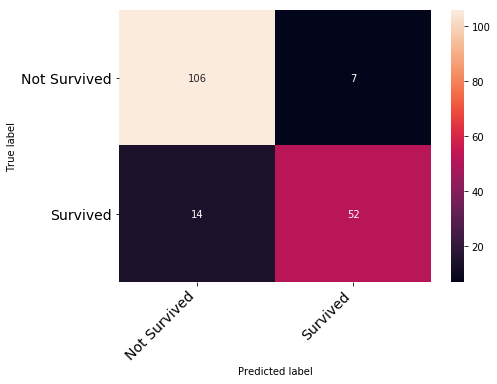

In [112]:
# Now I will Implemet Asked Questions
import seaborn as sns
import matplotlib.pyplot as plt  

def print_confusion_matrix(confusion_matrix, class_names, figsize = (7,5), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig


from sklearn.linear_model import LogisticRegression
LRModel = LogisticRegression(solver = 'newton-cg', max_iter = 2000, 
                                         random_state=42).fit(trainDataLR, yTrain)
coefs = LRModel.coef_[0]
features = XTrain.columns[XTrain.columns != 'Survived']
coefDF = pd.DataFrame({'feature' : features[chosenFeature], 'coef' : coefs})
coefDF = coefDF.sort_values(by=['coef'])
display(coefDF)
print('as we see in below table sex_num has most effect on Increasing Surviving Probability,')
print('also Pclass has most effect on decreasing Surviving Probability.')
print('Train Data Accuracy :')
print(LRModel.score(trainDataLR, yTrain))
print('Test Data Accuracy :')
print(LRModel.score(testDataLR, yTest))
yP = LRModel.predict(testDataLR)
from sklearn.metrics import confusion_matrix
plt = print_confusion_matrix(confusion_matrix(yTest, yP), ['Not Survived', 'Survived'])

# 3.2 KNN


In [22]:
from sklearn.neighbors import KNeighborsClassifier
#first Feature Selection
def doKnn(p) :
    n = XTrain.shape[1]
    accuracy = []
    chosens = []
    accMat = np.zeros((10,n))
    chosenMat = np.zeros((10,n))
    states = list(range(n))
    #XTrainFS, XTestFS, yTrainFS, yTestFS =  train_test_split(XTrain, yTrain, test_size=0.1, random_state=42)
    for k in range(10) :
        chosens.clear()
        accuracy.clear()
        for nFeatures in states : 
            maxacc = 0
            for i in states : 
                if (nFeatures == 0 or i not in chosens) :
                    if (nFeatures == 0) :
                        iters = [i]
                    else :
                        iters = chosens + [i]
                    LRModel = KNeighborsClassifier(n_neighbors= k+1, p = p).fit(XTrain[XTrain.columns[iters]], yTrain)
                    acc = LRModel.score(XTest[XTest.columns[iters]], yTest)
                    if (acc > maxacc) :
                        maxacc = acc
                        chosen = i
            if (nFeatures == 0) :
                accuracy = [maxacc]
                chosens = [chosen]
            else :
                accuracy = accuracy + [maxacc]
                chosens = chosens + [chosen] 
        accMat[k,] = accuracy
        chosenMat[k,] = chosens
    return (accMat, chosenMat)

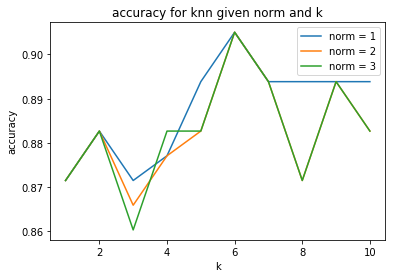

In [24]:
# feature Selection 
import matplotlib.pyplot as plt  
(accMat1, ChosenMat1) = doKnn(1)
bestAcc1 = np.max(accMat1, axis = 1)
x = list(range(11))
plt.plot(x[1:11], bestAcc1, label = 'norm = 1')
(accMat2, ChosenMat2) = doKnn(2)
bestAcc2 = np.max(accMat2, axis = 1)
plt.plot(x[1:11], bestAcc2, label = 'norm = 2')
(accMat3, ChosenMat3) = doKnn(3)
bestAcc3 = np.max(accMat3, axis = 1)
plt.plot(x[1:11], bestAcc3, label = 'norm = 3')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend()
plt.title('accuracy for knn given norm and k')
plt.show()

In [25]:
k = 6 # optimal k for norm 1
accMax1 = np.max(accMat1[k-1,:])
print('Max acc for norm1:')
print(accMax1)
nC1 = min(np.where(accMat1[k-1,:] == accMax1))[0]
print('Corrosponded features indexes for Max Acc for norm1:')
chosenFeature1 = ChosenMat1[k-1, 0:nC1+1]
knnFeatures1 = [int(i) for i in chosenFeature1]
print(knnFeatures1)
print('Chosen Features Names for norm1:')
print(list(features[knnFeatures1]))
trainDataKNN1 = XTrain[XTrain.columns[knnFeatures1]]
testDataKNN1 = XTest[XTest.columns[knnFeatures1]]
k = 6 # optimal k for norm 2
accMax2 = np.max(accMat2[k-1,:])
print('Max acc for norm1:')
print(accMax2)
nC2 = min(np.where(accMat2[k-1,:] == accMax2))[0]
print('Corrosponded features indexes for Max Acc for norm2:')
chosenFeature2 = ChosenMat2[k-1, 0:nC2+1]
knnFeatures2 = [int(i) for i in chosenFeature2]
print(knnFeatures2)
print('Chosen Features Names for norm2:')
print(list(features[knnFeatures2]))
trainDataKNN2 = XTrain[XTrain.columns[knnFeatures2]]
testDataKNN2 = XTest[XTest.columns[knnFeatures2]]
k = 6 # optimal k for norm 1
accMax3 = np.max(accMat3[k-1,:])
print('Max acc for norm3:')
print(accMax3)
nC3 = min(np.where(accMat3[k-1,:] == accMax3))[0]
print('Corrosponded features indexes for Max Acc for norm3:')
chosenFeature3 = ChosenMat3[k-1, 0:nC3+1]
knnFeatures3 = [int(i) for i in chosenFeature3]
print(knnFeatures3)
print('Chosen Features Names for norm3:')
print(list(features[knnFeatures3]))
trainDataKNN3 = XTrain[XTrain.columns[knnFeatures3]]
testDataKNN3 = XTest[XTest.columns[knnFeatures3]]

Max acc for norm1:
0.9050279329608939
Corrosponded features indexes for Max Acc for norm1:
[11, 20, 22, 0, 18, 14, 13, 15]
Chosen Features Names for norm1:
['myTitle_Mr', 'Deck_G', 'Companion', 'Pclass', 'Deck_E', 'Deck_A', 'myTitle_Other', 'Deck_B']
Max acc for norm1:
0.9050279329608939
Corrosponded features indexes for Max Acc for norm2:
[11, 20, 22, 0, 18, 14, 13, 15]
Chosen Features Names for norm2:
['myTitle_Mr', 'Deck_G', 'Companion', 'Pclass', 'Deck_E', 'Deck_A', 'myTitle_Other', 'Deck_B']
Max acc for norm3:
0.9050279329608939
Corrosponded features indexes for Max Acc for norm3:
[11, 20, 22, 0, 18, 14, 13, 15]
Chosen Features Names for norm3:
['myTitle_Mr', 'Deck_G', 'Companion', 'Pclass', 'Deck_E', 'Deck_A', 'myTitle_Other', 'Deck_B']


Train Data Accuracy for norm 1:
0.8019662921348315
Test Data Accuracy for norm 1:
0.9050279329608939
Train Data Accuracy for norm 2:
0.8019662921348315
Test Data Accuracy for norm 2:
0.9050279329608939
Train Data Accuracy for norm 3:
0.8019662921348315
Test Data Accuracy for norm 3:
0.9050279329608939


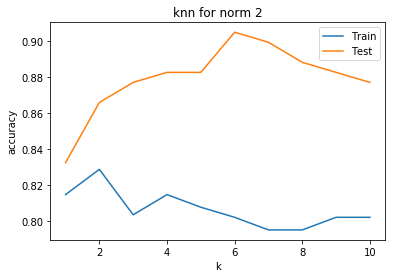

Optimum k is 6
Both precision and recall is increased in this new confusion matrix in compare with previous part.


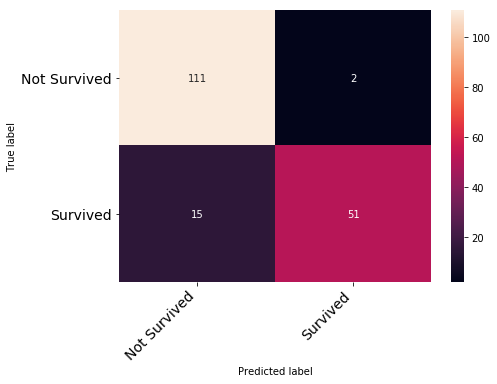

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.neighbors import KNeighborsClassifier

def print_confusion_matrix(confusion_matrix, class_names, figsize = (7,5), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

knnModel = KNeighborsClassifier(n_neighbors= 6, p = 1).fit(trainDataKNN1, yTrain)
print('Train Data Accuracy for norm 1:')
print(knnModel.score(trainDataKNN1, yTrain))
print('Test Data Accuracy for norm 1:')
print(knnModel.score(testDataKNN1, yTest))
knnModel = KNeighborsClassifier(n_neighbors= 6, p = 2).fit(trainDataKNN2, yTrain)
print('Train Data Accuracy for norm 2:')
print(knnModel.score(trainDataKNN2, yTrain))
print('Test Data Accuracy for norm 2:')
print(knnModel.score(testDataKNN2, yTest))
knnModel = KNeighborsClassifier(n_neighbors= 6, p = 3).fit(trainDataKNN3, yTrain)
print('Train Data Accuracy for norm 3:')
print(knnModel.score(trainDataKNN3, yTrain))
print('Test Data Accuracy for norm 3:')
print(knnModel.score(testDataKNN3, yTest))
accp2test = []
accp2train = []
for k in range(10) : 
    knnModel = KNeighborsClassifier(n_neighbors= k+1, p = 2).fit(trainDataKNN2, yTrain)
    accp2train = accp2train + [knnModel.score(trainDataKNN2, yTrain)]
    accp2test = accp2test + [knnModel.score(testDataKNN2, yTest)]
plt.plot(x[1:11], accp2train, label = 'Train')
plt.plot(x[1:11], accp2test, label = 'Test')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend()
plt.title('knn for norm 2')
plt.show()
print('Optimum k is 6')
print('Both precision and recall is increased in this new confusion matrix in compare with previous part.')
knnModel = KNeighborsClassifier(n_neighbors= 6, p = 2).fit(trainDataKNN2, yTrain)
yP = knnModel.predict(testDataKNN2)
from sklearn.metrics import confusion_matrix
plt = print_confusion_matrix(confusion_matrix(yTest, yP), ['Not Survived', 'Survived'])

# 3.3 SVM

In [5]:
from sklearn import svm
def doSVM(kernel, XDTrain, XDTest) : 
    n = XDTrain.shape[1]
    accuracy = []
    chosens = []
    states = list(range(n))
    for nFeatures in states : 
        maxacc = 0
        for i in states : 
            if (nFeatures == 0 or i not in chosens) :
                if (nFeatures == 0) :
                    iters = [i]
                else :
                    iters = chosens + [i]
                if (kernel == 'rbf') :
                    SWMmodel = svm.SVC(kernel=kernel, gamma = 'auto').fit(XDTrain[XDTrain.columns[iters]], yTrain)
                    acc = SWMmodel.score(XDTest[XDTest.columns[iters]], yTest)
                else :
                    SWMmodel = svm.SVC(kernel=kernel).fit(XDTrain[XDTrain.columns[iters]], yTrain)
                    acc = SWMmodel.score(XDTest[XDTest.columns[iters]], yTest)
                if (acc > maxacc) :
                    maxacc = acc
                    chosen = i
        if (nFeatures == 0) :
            accuracy = [maxacc]
            chosens = [chosen]
        else :
            accuracy = accuracy + [maxacc]
            chosens = chosens + [chosen] 
    return (accuracy, chosens)

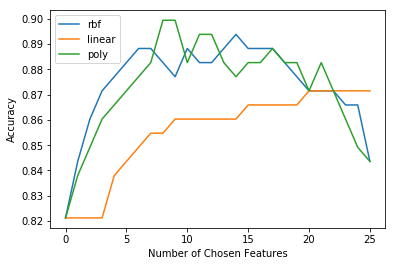

In [8]:
import matplotlib.pyplot as plt  
(accuracy1, chosens1) = doSVM('rbf', XTrainScaled, XTestScaled)
plt.plot(accuracy1, label = 'rbf')
nC1 = min(np.where(accuracy1 == max(accuracy1))[0])
chosenFeature1 = chosens1[0:nC1+1]
trainDataSVMrbf = XTrainScaled[XTrainScaled.columns[chosenFeature1]]
testDataSVMrbf = XTestScaled[XTestScaled.columns[chosenFeature1]]
(accuracy2, chosens2) = doSVM('linear', XTrainScaled, XTestScaled)
plt.plot(accuracy2, label = 'linear')
nC2 = min(np.where(accuracy2 == max(accuracy2))[0])
chosenFeature2 = chosens2[0:nC2+1]
trainDataSVMlinear = XTrainScaled[XTrainScaled.columns[chosenFeature2]]
testDataSVMlinear = XTestScaled[XTestScaled.columns[chosenFeature2]]
(accuracy3, chosens3) = doSVM('poly', XTrainScaled, XTestScaled)
plt.plot(accuracy3, label = 'poly')
plt.xlabel('Number of Chosen Features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
nC3 = min(np.where(accuracy3 == max(accuracy3))[0])
chosenFeature3 = chosens3[0:nC3+1]
trainDataSVMpoly = XTrainScaled[XTrainScaled.columns[chosenFeature3]]
testDataSVMrply = XTestScaled[XTestScaled.columns[chosenFeature3]]

Train Accuracy percentage for rbf SVM :
0.8412921348314607
Test Accuracy percentage for rbf SVM :
0.8938547486033519
Train Accuracy percentage for linear SVM :
0.8230337078651685
Test Accuracy percentage for linear SVM :
0.8715083798882681
Train Accuracy percentage for poly SVM :
0.8188202247191011
Test Accuracy percentage for poly SVM :
0.8994413407821229
f1 score for rbf SVM:
0.8429752066115703
f1 score for linear SVM:
0.8130081300813008
f1 score for poly SVM:
0.8474576271186441
f1 score is near to accuracy so we can deduce both pericision and recall are good enough.


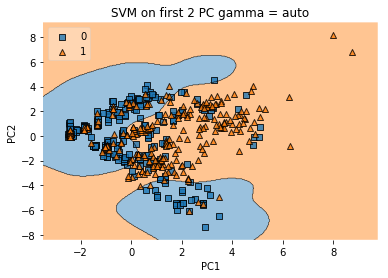

if we increase gamma we will see overfiting


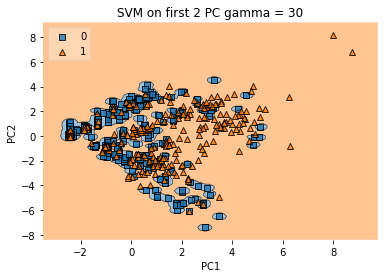

In [21]:
from sklearn import svm
from sklearn.metrics import f1_score
SVMmodel1 = svm.SVC(kernel='rbf', gamma = 'auto').fit(trainDataSVMrbf, yTrain)
accTrain = SVMmodel1.score(trainDataSVMrbf, yTrain)
accTest = SVMmodel1.score(testDataSVMrbf, yTest)
print('Train Accuracy percentage for rbf SVM :')
print(accTrain)
print('Test Accuracy percentage for rbf SVM :')
print(accTest)
from sklearn import svm
SVMmodel2 = svm.SVC(kernel='linear', gamma = 'auto').fit(trainDataSVMlinear, yTrain)
accTrain = SVMmodel2.score(trainDataSVMlinear, yTrain)
accTest = SVMmodel2.score(testDataSVMlinear, yTest)
print('Train Accuracy percentage for linear SVM :')
print(accTrain)
print('Test Accuracy percentage for linear SVM :')
print(accTest)
SVMmodel3 = svm.SVC(kernel='poly', gamma = 'auto').fit(trainDataSVMpoly, yTrain)
accTrain = SVMmodel3.score(trainDataSVMpoly, yTrain)
accTest = SVMmodel3.score(testDataSVMrply, yTest)
print('Train Accuracy percentage for poly SVM :')
print(accTrain)
print('Test Accuracy percentage for poly SVM :')
print(accTest)
ypred1 = SVMmodel1.predict(testDataSVMrbf)
print('f1 score for rbf SVM:')
print(f1_score(yTest, ypred1))
ypred2 = SVMmodel2.predict(testDataSVMlinear)
print('f1 score for linear SVM:')
print(f1_score(yTest, ypred2))
ypred3 = SVMmodel3.predict(testDataSVMrply)
print('f1 score for poly SVM:')
print(f1_score(yTest, ypred3))
print('f1 score is near to accuracy so we can deduce both pericision and recall are good enough.')
from sklearn import svm
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(XTrainScaled)
Xpca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
svm = svm.SVC(kernel='rbf', gamma = 'auto')
svm.fit(Xpca, yTrain)
label = yTrain
label = [int(i) for i in label]
plot_decision_regions(Xpca.to_numpy(), np.array(label), clf=svm, legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVM on first 2 PC gamma = auto')
plt.show()
from sklearn import svm
svm = svm.SVC(kernel='rbf', gamma = 30)
svm.fit(Xpca, yTrain)
label = yTrain
label = [int(i) for i in label]
plot_decision_regions(Xpca.to_numpy(), np.array(label), clf=svm, legend=2)
print('if we increase gamma we will see overfiting')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVM on first 2 PC gamma = 30')
plt.show()

# 3.4 Naive Bayesian Classifier

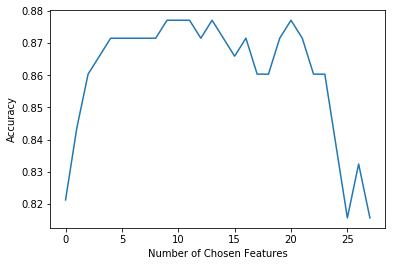

Maximum Acc in Feature Selection Process:
0.8770949720670391
Corrosponded features indexes for Max Acc :
[8, 22, 4, 9, 2, 1, 6, 7, 10, 0]
Chosen Features Names :
['sex_num', 'Companion', 'Fare', 'myTitle_Master', 'SibSp', 'Age', 'Embarked_Q', 'Embarked_S', 'myTitle_Miss', 'Pclass']


In [30]:
# feature Selection 
# First i Perform Feature Selection and then i will ANSWER given Question
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt 

n = XTrain.shape[1]
accuracy = []
chosens = []
accuracy.clear()
chosens.clear()
states = list(range(n))
#XTrainFS, XTestFS, yTrainFS, yTestFS =  train_test_split(XTrainScaled, yTrain, test_size=0.1, random_state=42)
for nFeatures in states : 
    maxacc = 0
    for i in states : 
        if (nFeatures == 0 or i not in chosens) :
            if (nFeatures == 0) :
                iters = [i]
            else :
                iters = chosens + [i]
            gnb = GaussianNB().fit(XTrain, yTrain).fit(XTrain[XTrain.columns[iters]], yTrain)
            acc = gnb.score(XTest[XTest.columns[iters]], yTest)
            if (acc > maxacc) :
                maxacc = acc
                chosen = i
    if (nFeatures == 0) :
        accuracy = [maxacc]
        chosens = [chosen]
    else :
        accuracy = accuracy + [maxacc]
        chosens = chosens + [chosen] 
    
plt.plot(accuracy)
plt.xlabel('Number of Chosen Features')
plt.ylabel('Accuracy')
plt.show()
print('Maximum Acc in Feature Selection Process:')
print(max(accuracy))
nC = min(np.where(accuracy == max(accuracy))[0])
print('Corrosponded features indexes for Max Acc :')
chosenFeature = chosens[0:nC+1]
print(chosenFeature)
print('Chosen Features Names :')
print(list(features[chosenFeature]))
trainDatagnb =  XTrain[XTrain.columns[chosenFeature]]
testDatagnb = XTest[XTest.columns[chosenFeature]]

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(trainDatagnb, yTrain)
from sklearn import metrics
print('Smoothing :')
print('We add a noise to probabilities in order to handle 0 cases and also avoid overfitting')
print('Train Accuracy :')
print(gnb.score(trainDatagnb, yTrain))
print('Test Accuracy :')
print(gnb.score(testDatagnb, yTest))
yPred = gnb.predict(testDatagnb)
yTest = [int(i) for i in yTest]
yPred = [int(i) for i in yPred]
fpr, tpr, thresholds = metrics.roc_curve(yTest, yPred, pos_label=1)
print('AUC :')
print(metrics.auc(fpr, tpr)) 
print('AUC is better measure of classifier performance than accuracy because it does not bias on size of test or evaluation data. Accuracy is always biased on size of test data.')

Smoothing :
We add a noise to probabilities in order to handle 0 cases and also avoid overfitting
Train Accuracy :
0.8047752808988764
Test Accuracy :
0.8770949720670391
AUC :
0.8553901850362027
AUC is better measure of classifier performance than accuracy because it does not bias on size of test or evaluation data. Accuracy is always biased on size of test data.


# 3.5 Random Forest

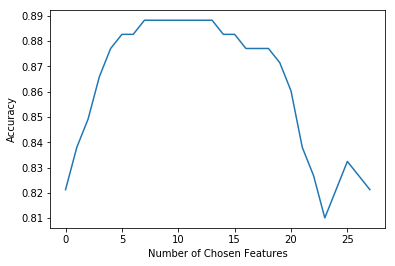

Maximum Acc in Feature Selection Process:
0.888268156424581
Corrosponded features indexes for Max Acc :
[8, 20, 22, 0, 9, 18, 11, 15]
Chosen Features Names :
['sex_num', 'Deck_G', 'Companion', 'Pclass', 'myTitle_Master', 'Deck_E', 'myTitle_Mr', 'Deck_B']


In [50]:
# feature Selection 
# First i Perform Feature Selection and then i will ANSWER given Question
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt 

n = XTrain.shape[1]
accuracy = []
chosens = []
accuracy.clear()
chosens.clear()
states = list(range(n))
#XTrainFS, XTestFS, yTrainFS, yTestFS =  train_test_split(XTrainScaled, yTrain, test_size=0.1, random_state=42)
for nFeatures in states : 
    maxacc = 0
    for i in states : 
        if (nFeatures == 0 or i not in chosens) :
            if (nFeatures == 0) :
                iters = [i]
            else :
                iters = chosens + [i]
            rf = RandomForestClassifier(n_estimators = 40, random_state = 6).fit(XTrain[XTrain.columns[iters]], yTrain)
            acc = rf.score(XTest[XTest.columns[iters]], yTest)
            if (acc > maxacc) :
                maxacc = acc
                chosen = i
    if (nFeatures == 0) :
        accuracy = [maxacc]
        chosens = [chosen]
    else :
        accuracy = accuracy + [maxacc]
        chosens = chosens + [chosen] 
    
plt.plot(accuracy)
plt.xlabel('Number of Chosen Features')
plt.ylabel('Accuracy')
plt.show()
print('Maximum Acc in Feature Selection Process:')
print(max(accuracy))
nC = min(np.where(accuracy == max(accuracy))[0])
print('Corrosponded features indexes for Max Acc :')
chosenFeature = chosens[0:nC+1]
print(chosenFeature)
print('Chosen Features Names :')
print(list(features[chosenFeature]))
trainDatarf =  XTrain[XTrain.columns[chosenFeature]]
testDatagrf = XTest[XTest.columns[chosenFeature]]

In [59]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 6)
rf.fit(trainDatarf, yTrain);
print('Train Acc :')
print(rf.score(trainDatarf, yTrain))
print('Test Acc :')
print(rf.score(testDatagrf, yTest))

Train Acc :
0.8370786516853933
Test Acc :
0.8770949720670391


In [53]:
# now we optimize parameters using 5 fold 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
from sklearn.model_selection import GridSearchCV
grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = grid, cv = 5)
grid_search.fit(XTrain, yTrain)
print('Best Parameters :')
display(grid_search.best_params_)

Best Parameters :


{'max_depth': 6, 'n_estimators': 112}

In [58]:
# model and f1 for best model
from sklearn.metrics import f1_score
rf = RandomForestClassifier(n_estimators = 112, max_depth = 6, random_state = 6)
rf.fit(trainDatarf, yTrain);
print('Train Acc :')
print(rf.score(trainDatarf, yTrain))
print('Test Acc :')
print(rf.score(testDatagrf, yTest))
print('f1 score :')
print(f1_score(yTest, rf.predict(testDatagrf)))

Train Acc :
0.8328651685393258
Test Acc :
0.888268156424581
f1 score :
0.8360655737704916


# 3.6 Neural Network

In [2]:
# First i Perform Feature Selection and then i will ANSWER given Question
# (20,10)
import matplotlib.pyplot as plt 
from sklearn.neural_network import MLPClassifier

n = XTrain.shape[1]
accuracy = []
chosens = []
accuracy.clear()
chosens.clear()
states = list(range(n))
#XTrainFS, XTestFS, yTrainFS, yTestFS =  train_test_split(XTrainScaled, yTrain, test_size=0.1, random_state=42)
for nFeatures in states : 
    maxacc = 0
    for i in states : 
        if (nFeatures == 0 or i not in chosens) :
            if (nFeatures == 0) :
                iters = [i]
            else :
                iters = chosens + [i]
            clf = MLPClassifier(solver='adam',  activation='relu', batch_size=32,  alpha=1e-5, 
                    hidden_layer_sizes=(20,10), max_iter = 20, random_state=0, learning_rate_init = 0.001).fit(XTrain[XTrain.columns[iters]], yTrain)
            acc = clf.score(XTrain[XTrain.columns[iters]], yTrain)
            if (acc > maxacc) :
                maxacc = acc
                chosen = i
    if (nFeatures == 0) :
        accuracy = [maxacc]
        chosens = [chosen]
    else :
        accuracy = accuracy + [maxacc]
        chosens = chosens + [chosen] 
    
plt.plot(accuracy)
plt.xlabel('Number of Chosen Features')
plt.ylabel('Accuracy')
plt.show()
print('Maximum Acc in Feature Selection Process:')
print(max(accuracy))
nC = min(np.where(accuracy == max(accuracy))[0])
print('Corrosponded features indexes for Max Acc :')
chosenFeature = chosens[0:nC+1]
print(chosenFeature)
print('Chosen Features Names :')
print(list(features[chosenFeature]))
trainDataNN =  XTrain[XTrain.columns[chosenFeature]]
testDataNN = XTest[XTest.columns[chosenFeature]]

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

<Figure size 640x480 with 1 Axes>

Maximum Acc in Feature Selection Process:
0.851123595505618
Corrosponded features indexes for Max Acc :
[8, 2, 26, 0, 9, 20, 24, 5, 19, 17, 18, 7, 13, 11, 12, 3]
Chosen Features Names :
['sex_num', 'SibSp', 'groupedAge', 'Pclass', 'myTitle_Master', 'Deck_G', 'CabinRecoverd', 'Embarked_C', 'Deck_F', 'Deck_D', 'Deck_E', 'Embarked_S', 'myTitle_Other', 'myTitle_Mr', 'myTitle_Mrs', 'Parch']


/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.

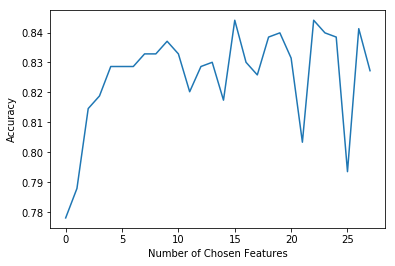

Maximum Acc in Feature Selection Process:
0.8441011235955056
Corrosponded features indexes for Max Acc :
[8, 2, 1, 0, 18, 20, 5, 12, 10, 22, 9, 4, 24, 3, 11, 27]
Chosen Features Names :
['sex_num', 'SibSp', 'Age', 'Pclass', 'Deck_E', 'Deck_G', 'Embarked_C', 'myTitle_Mrs', 'myTitle_Miss', 'Companion', 'myTitle_Master', 'Fare', 'CabinRecoverd', 'Parch', 'myTitle_Mr', 'gFare']


In [3]:
# (100,50)
import matplotlib.pyplot as plt 
from sklearn.neural_network import MLPClassifier

n = XTrain.shape[1]
accuracy = []
chosens = []
accuracy.clear()
chosens.clear()
states = list(range(n))
#XTrainFS, XTestFS, yTrainFS, yTestFS =  train_test_split(XTrainScaled, yTrain, test_size=0.1, random_state=42)
for nFeatures in states : 
    maxacc = 0
    for i in states : 
        if (nFeatures == 0 or i not in chosens) :
            if (nFeatures == 0) :
                iters = [i]
            else :
                iters = chosens + [i]
            clf = MLPClassifier(solver='adam',  activation='relu', batch_size=32,  alpha=1e-5, 
                    hidden_layer_sizes=(100,50), max_iter = 20, random_state=0, learning_rate_init = 0.001).fit(XTrain[XTrain.columns[iters]], yTrain)
            acc = clf.score(XTrain[XTrain.columns[iters]], yTrain)
            if (acc > maxacc) :
                maxacc = acc
                chosen = i
    if (nFeatures == 0) :
        accuracy = [maxacc]
        chosens = [chosen]
    else :
        accuracy = accuracy + [maxacc]
        chosens = chosens + [chosen] 
    
plt.plot(accuracy)
plt.xlabel('Number of Chosen Features')
plt.ylabel('Accuracy')
plt.show()
print('Maximum Acc in Feature Selection Process:')
print(max(accuracy))
nC = min(np.where(accuracy == max(accuracy))[0])
print('Corrosponded features indexes for Max Acc :')
chosenFeature = chosens[0:nC+1]
print(chosenFeature)
print('Chosen Features Names :')
print(list(features[chosenFeature]))
trainDataNN1 =  XTrain[XTrain.columns[chosenFeature]]
testDataNN1 = XTest[XTest.columns[chosenFeature]]

/home/mehrsa/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(100,50) case has more test accuracy cause it has more parameters and can approxiamate more functions.
Train Accuracy (20,10):
0.8834269662921348
Test Accuracy (20,10):
0.8324022346368715
Train Accuracy (100,50):
0.8426966292134831
Test Accuracy (100,50):
0.8547486033519553


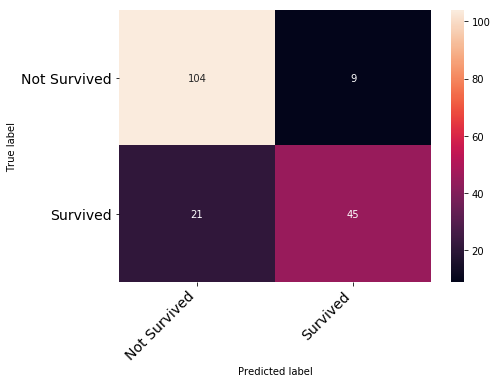

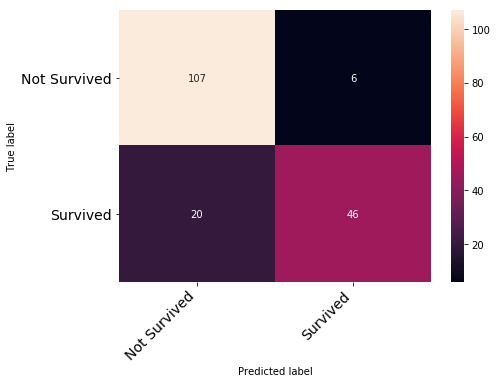

In [6]:
# i tuned parameters using Azmayesh va Khata :)
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt  
# i increased number of epochs because 20 was not large enough
clf = MLPClassifier(solver='adam',  activation='relu', batch_size=32,  alpha=1e-5, 
                    hidden_layer_sizes=(20,10), max_iter = 200, random_state=0, learning_rate_init = 0.001)
clf.fit(trainDataNN, yTrain)
print('(100,50) case has more test accuracy cause it has more parameters and can approxiamate more functions.')
print('Train Accuracy (20,10):')
print(clf.score(trainDataNN, yTrain))
print('Test Accuracy (20,10):')
print(clf.score(testDataNN, yTest))

def print_confusion_matrix(confusion_matrix, class_names, figsize = (7,5), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

yP = clf.predict(testDataNN)
from sklearn.metrics import confusion_matrix
plt = print_confusion_matrix(confusion_matrix(yTest, yP), ['Not Survived', 'Survived'])
import matplotlib.pyplot as plt 
clf = MLPClassifier(solver='adam',  activation='relu', batch_size=32,  alpha=1e-5, 
                    hidden_layer_sizes=(100,50), max_iter = 200, random_state=0, learning_rate_init = 0.0001)
clf.fit(trainDataNN1, yTrain)
print('Train Accuracy (100,50):')
print(clf.score(trainDataNN1, yTrain))
print('Test Accuracy (100,50):')
print(clf.score(testDataNN1, yTest))
yP = clf.predict(testDataNN1)
from sklearn.metrics import confusion_matrix
plt = print_confusion_matrix(confusion_matrix(yTest, yP), ['Not Survived', 'Survived'])